### Pair Programming – EDA III

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.
- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?
- ¿Qué edad recibe mayor número de ataques?

    💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.
- Ataques entre sexos, ¿hay diferencia?
- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [108]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex as re
warnings.filterwarnings("ignore")

In [109]:
df = pd.read_csv("datos/attacks_pandas_8.csv")

In [110]:
# Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

plt.rcParams["figure.figsize"] = (10, 6)

In [111]:
df["country"].value_counts()

usa                   741
australia             343
south africa          234
bahamas                29
new zealand            21
                     ... 
greenland               1
st. maartin             1
united kingdom          1
sweden                  1
ceylon (sri lanka)      1
Name: country, Length: 95, dtype: int64

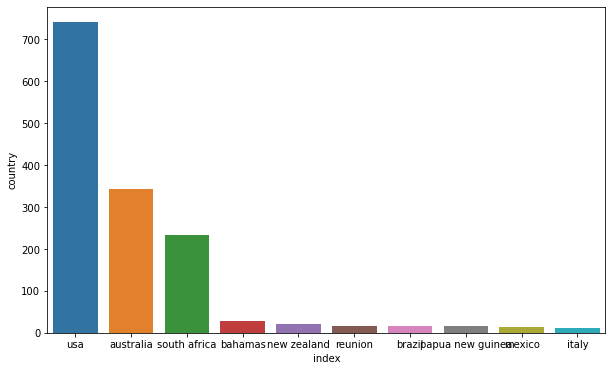

In [112]:
# Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para
# hacer una primera aproximación a nuestras hipótesis:
# ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no,
# seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

df_country = df["country"].value_counts()
df_country_10 = df_country[0:10].reset_index()

sns.barplot(x = "index", y = "country", data = df_country_10);

In [113]:
df_country_10.head(2)

,index,country
0,usa,741
1,australia,343


In [114]:
df_filtrado_10 = df[df["country"].isin(["usa", "australia", "south africa", "bahamas", "new zealand", "reunion", "brazil", "papua new guinea", "mexico", "italy"])]

In [115]:
df_filtrado_10.head(2)

,Unnamed: 0,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_
0,0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",57.0,White Shark,25-Jun-2018,Jun,N,F,usa
1,1,2018.06.03.a,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",18.0,Tiger Shark,03-Jun-2018,Jun,Y,M,brazil


<AxesSubplot:xlabel='country', ylabel='Count'>

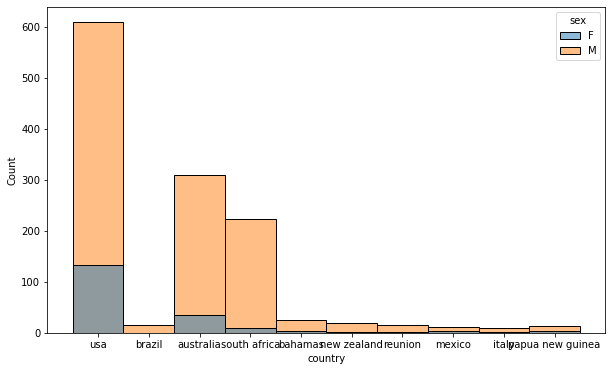

In [116]:
# Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

sns.histplot(x = "country", data = df_filtrado_10, hue = "sex")

In [117]:
# ¿Qué edad recibe mayor número de ataques? Para que esta gráfica nos salga legible
# tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut()
# que aprendimos en la lección de Limpieza II.

In [118]:
df["age_bins"] = pd.cut(df["age"], 6, labels = ["Niños", "Jóvenes", "Adultos", "Adultos mayores", "Mayores", "Sénior"]) 

In [119]:
df["age_bins"].value_counts()

Jóvenes            607
Niños              396
Adultos            281
Adultos mayores    164
Mayores             58
Sénior               8
Name: age_bins, dtype: int64

In [120]:
df["age"].max()

84.0

El grupo de edad más afectado son los jóvenes.

Rangos de edad:

- 0-14: Niños

- 15-28 Jóvenes

- 29-42: Adultos

- 43-56: Adultos mayores

- 57-70: Mayores

- 71-84: Sénior

In [121]:
# Ataques entre sexos, ¿hay diferencia?

In [122]:
df.groupby(["sex"])["age_bins"].value_counts()

sex  age_bins       
F    Niños               82
     Jóvenes             47
     Adultos             40
     Adultos mayores     21
     Mayores             17
     Sénior               2
M    Jóvenes            560
     Niños              314
     Adultos            241
     Adultos mayores    143
     Mayores             41
     Sénior               6
Name: age_bins, dtype: int64

<AxesSubplot:xlabel='age_bins', ylabel='Count'>

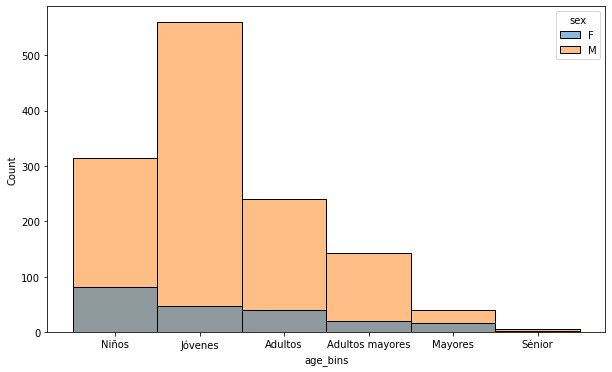

In [123]:
sns.histplot(x="age_bins",data= df, hue= "sex")

Hay diferencia. Los hombres jóvenes son atacados casi seis veces más que las mujeres jóvenes. Lo mismo sucede para los adultos, aunque en el caso de los mayores, los hombres suponen tan sólo el doble.

In [124]:
# ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para
# que os salga mejor.

<AxesSubplot:xlabel='mes', ylabel='Count'>

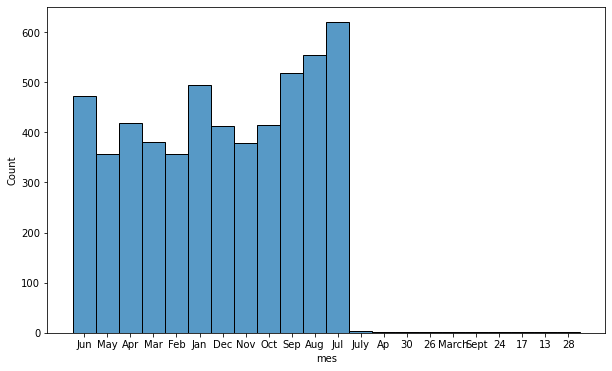

In [125]:
sns.histplot(x = "mes", data = df)

In [126]:
# Decidimos limpiar la columna mes:

#patron_mes = "[0-9]+"

In [127]:
#meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def limpia(data, col):
    for i in data[col]:
        if i not in meses:
            return np.nan

In [128]:
#limpia(df, "mes")

In [129]:
df["mes"].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', nan, 'July', 'Ap', '30', '26', 'March',
       'Sept', '24', '17', '13', '28'], dtype=object)

In [130]:
df["mes"].value_counts()

Jul      620
Aug      554
Sep      519
Jan      494
Jun      473
Apr      419
Oct      415
Dec      413
Mar      381
Nov      378
May      357
Feb      356
July       4
Sept       2
Ap         2
26         1
March      1
30         1
24         1
17         1
13         1
28         1
Name: mes, dtype: int64

Como vemos que los valores únicos que no nos interesan son muy pocos, decidimos sustituirlos por nulos.

In [131]:
df[df["mes"]=="Ap"]

,Unnamed: 0,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_,age_bins
3462,3462,2001.04.02.b,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,02-Ap-2001,Ap,N,F,NaN,NaN
6371,6371,1936.04.08,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,08-Ap-1936,Ap,N,M,NaN,NaN


In [132]:
df

,Unnamed: 0,case_number,year,type,country,area,location,age,species_,date,mes,fatal_(y/n)_limpio,sex,country_,age_bins
0,0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",57.0,White Shark,25-Jun-2018,Jun,N,F,usa,Adultos mayores
1,1,2018.06.03.a,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",18.0,Tiger Shark,03-Jun-2018,Jun,Y,M,brazil,Niños
2,2,2018.05.26.b,2018.0,Unprovoked,usa,Florida,"Cocoa Beach, Brevard County",15.0,Bull Shark,26-May-2018,May,N,M,usa,Niños
3,3,2018.05.24,2018.0,Provoked,australia,Queensland,Cairns Aquarium,32.0,Grey Shark,24-May-2018,May,N,M,australia,Adultos
4,4,2018.05.13.a,2018.0,Invalid,england,Cornwall,Off Land's End,21.0,Unspecified,13-May-2018,May,N,M,england,Jóvenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,7784,ND.0003,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,1900-1905,NaN,Y,F,NaN,NaN
7785,7785,ND.0002,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,1883-1889,NaN,Y,M,NaN,NaN
7786,7786,ND.0001,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,1845-1853,NaN,Y,F,NaN,NaN
7787,7787,0,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,M,NaN,NaN


In [133]:
lista_sucios = []
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", np.nan]

for x in df["mes"]:

    #print(x)
    if x in meses:
        pass
    else:
        lista_sucios.append(x)

lista_sucios
for b in lista_sucios:
    df["mes"] = df["mes"].str.replace(b, "como")

In [134]:
lista_sucios

['July',
 'July',
 'Ap',
 '30',
 'July',
 'Ap',
 'July',
 '26',
 'March',
 'Sept',
 'Sept',
 '24',
 '17',
 '13',
 '28']

In [135]:
df["mes"].value_counts()

Jul      620
Aug      554
Sep      519
Jan      494
Jun      473
comor    419
Oct      415
Dec      413
Mar      381
Nov      378
May      357
Feb      356
como      15
Name: mes, dtype: int64

In [136]:
df["mes"] = df["mes"].str.replace("comor", "Apr")

In [137]:
df["mes"].value_counts()

Jul     620
Aug     554
Sep     519
Jan     494
Jun     473
Apr     419
Oct     415
Dec     413
Mar     381
Nov     378
May     357
Feb     356
como     15
Name: mes, dtype: int64

def num(col):
    try:
        return re.findall(patron_mes, "holi")[0]
    except: 
        return np.nan